In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler

import warnings 
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the Dataset
dataframe=pd.read_csv("/kaggle/input/fish-market/Fish.csv")
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
# shape of the dataset
dataframe.shape

(159, 7)

# Exploratory Data Analysis

In [4]:
# Info of data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
# Describe the dataset
dataframe.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
# Check the duplicate values in the dataset
dataframe.duplicated().sum()

0

In [7]:
# Check Is there any null value in the dataset
dataframe.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
# Lets make the correlation matrix
correlation_matrix= dataframe.corr()
correlation_matrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


# Visulaize the Correlation Matrix

<function matplotlib.pyplot.show(close=None, block=None)>

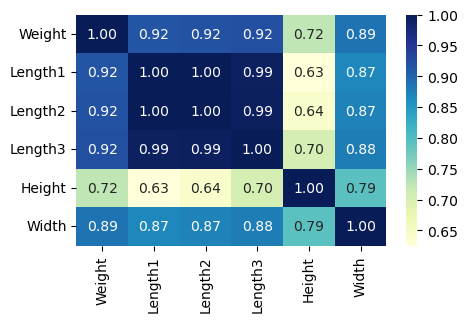

In [9]:
plt.figure(figsize=(5,3))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

Here we see that, the Length1 and Length2 are highly correlated with each other and their correlation is 1. But both represents the different features of fish, that is vertical length of fish(Length1 in cm)  and  Length2 is the diagonal length of fish in cm.Both have their individual importance.

In [10]:
# Lets check the no. of unique values in Species Column
dataframe["Species"].nunique()

7

In [11]:
# Lets see the unique values in Species Column
dataframe["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

# Convert the Categorical column into Numeriacal form Using Label Encoder

In [12]:
le= LabelEncoder()
dataframe["Species"]=le.fit_transform(dataframe["Species"])

# Univariate Analysis

# Frequency Plot of Species

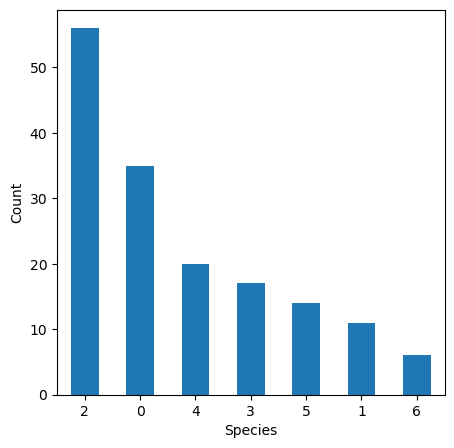

In [13]:
dataframe["Species"].value_counts().plot(kind="bar", figsize=(5,5), rot=0)
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

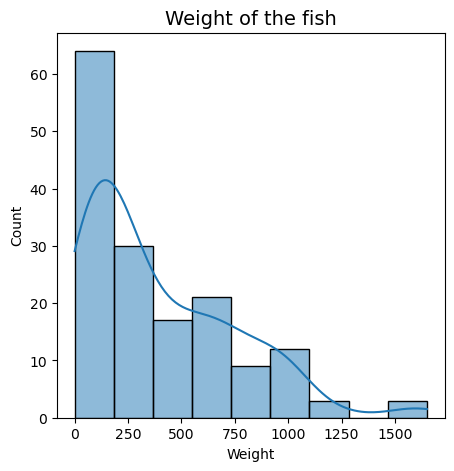

In [14]:
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe, x=dataframe["Weight"], kde=True)
sns.set(style="darkgrid")
plt.title("Weight of the fish", fontsize=14)
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()

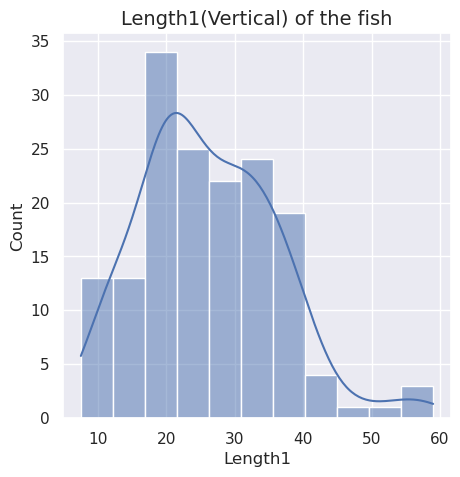

In [15]:
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe, x=dataframe["Length1"], kde=True)
sns.set(style="darkgrid")
plt.title("Length1(Vertical) of the fish", fontsize=14)
plt.xlabel("Length1")
plt.ylabel("Count")
plt.show()

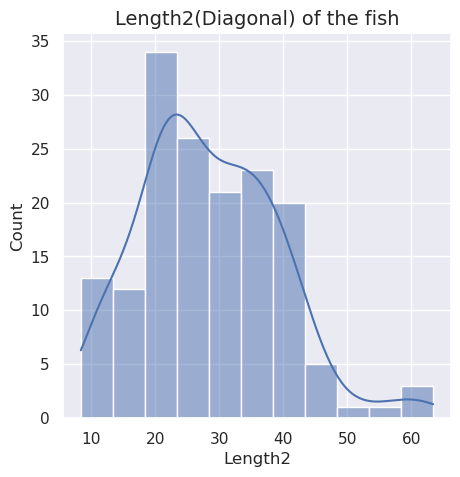

In [16]:
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe, x=dataframe["Length2"], kde=True)
sns.set(style="darkgrid")
plt.title("Length2(Diagonal) of the fish", fontsize=14)
plt.xlabel("Length2")
plt.ylabel("Count")
plt.show()

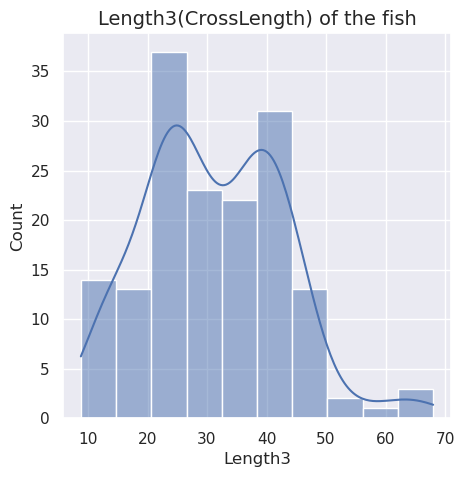

In [17]:
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe, x=dataframe["Length3"], kde=True)
sns.set(style="darkgrid")
plt.title("Length3(CrossLength) of the fish", fontsize=14)
plt.xlabel("Length3")
plt.ylabel("Count")
plt.show()

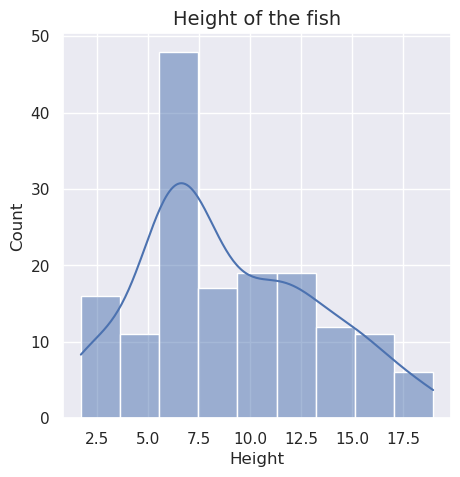

In [18]:
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe, x=dataframe["Height"], kde=True)
sns.set(style="darkgrid")
plt.title("Height of the fish", fontsize=14)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

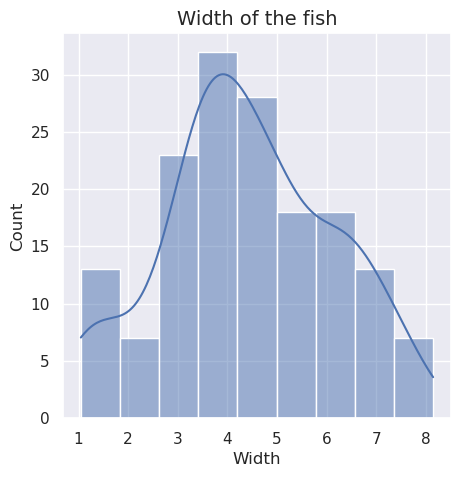

In [19]:
plt.figure(figsize=(5,5))
sns.histplot(data=dataframe, x=dataframe["Width"], kde=True)
sns.set(style="darkgrid")
plt.title("Width of the fish", fontsize=14)
plt.xlabel("Width")
plt.ylabel("Count")
plt.show()

# Let's visulize the Boxplot that helps us to see the outliers in the dataset

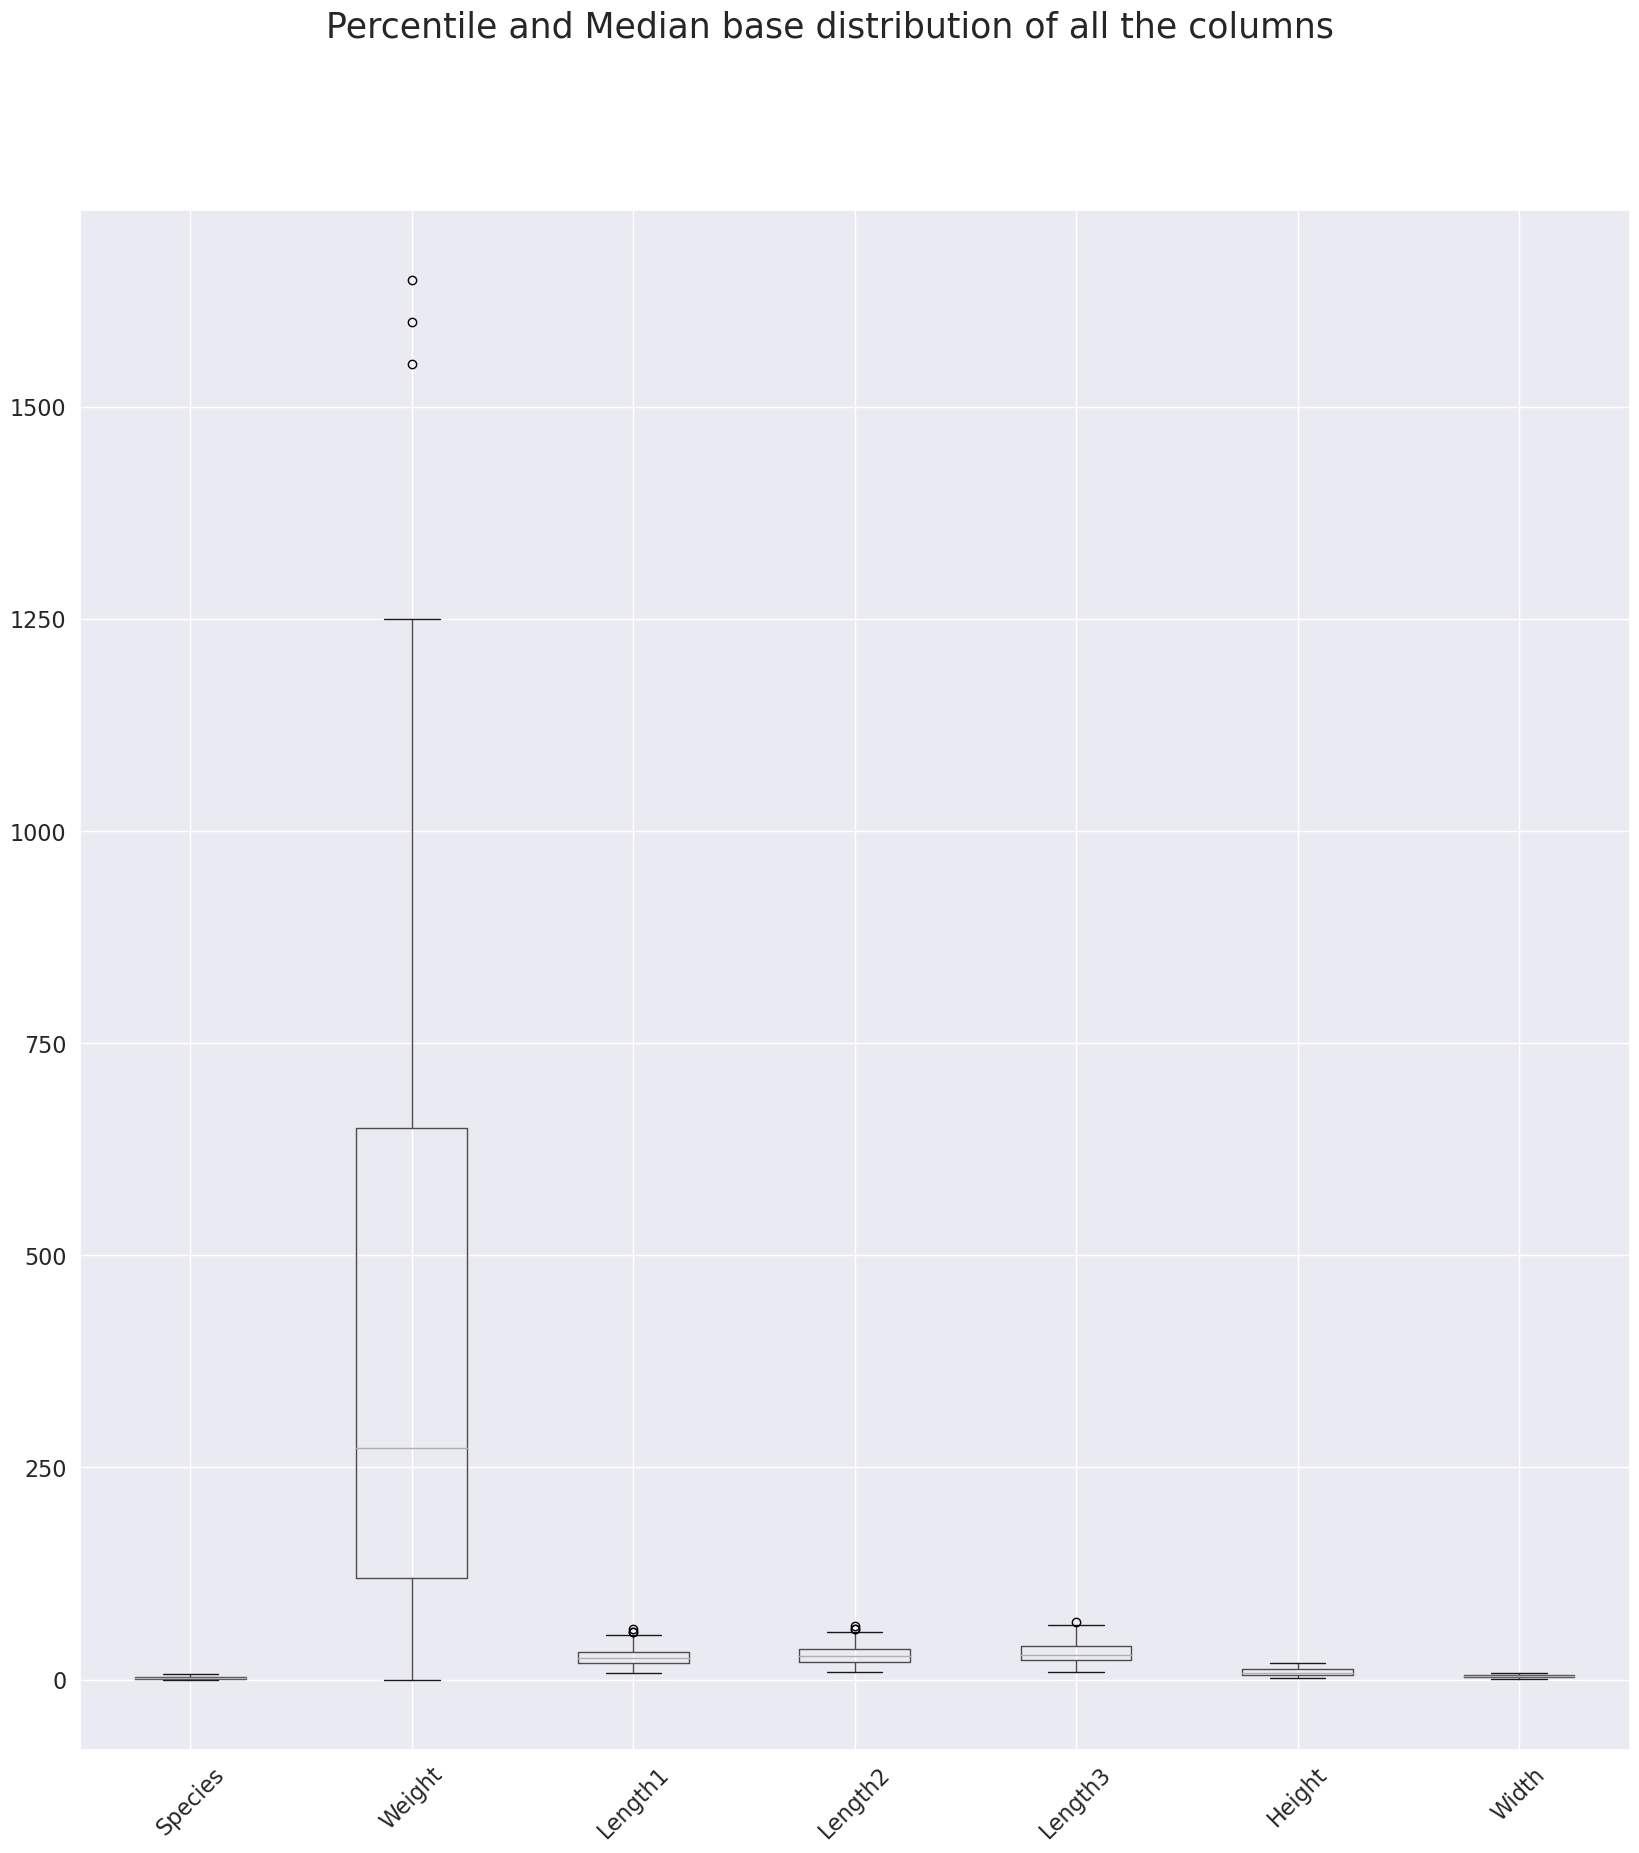

In [20]:
dataframe.boxplot(column=dataframe.columns.tolist(), figsize=(20,20), grid=True, rot=45, fontsize=16)
plt.suptitle("Percentile and Median base distribution of all the columns", fontsize=25)
plt.show()

# Read the dataset again

In [21]:
dataframe=pd.read_csv("/kaggle/input/fish-market/Fish.csv")
dataframe.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [22]:
dataframe.shape

(159, 7)

# Get the Numerical and Categorical Columns list

In [23]:
def get_numerical_and_categorical_columns(dataframe):
    
    numerical_cols = []
    categorical_cols = []
    for column in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            numerical_cols.append(column)
        else:
            categorical_cols.append(column)
            
    return numerical_cols, categorical_cols

In [24]:
numerical_cols, categorical_cols= get_numerical_and_categorical_columns(dataframe)

In [25]:
numerical_cols

['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

In [26]:
categorical_cols

['Species']

# Divide the Dataset into Train and Test Set

In [27]:
def train_test(dataframe):
    length= len(dataframe)
    dataframe1= dataframe.iloc[:int(0.7 * length)]
    dataframe2= dataframe.iloc[int(0.7 * length):]
    return dataframe1, dataframe2

In [28]:
dataframe1, dataframe2 =train_test(dataframe)

In [29]:
dataframe1.shape

(111, 7)

In [30]:
dataframe2.shape

(48, 7)

# Detect the outliers in the dataset using Winsorization Method

In [31]:
def Winsorization_Method(columns, dataframe, a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(dataframe[col], a)
        q2= np.percentile(dataframe[col],b)
        
        for pos in range(len(dataframe)):
            if dataframe[col].iloc[pos]>q2 or dataframe[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(dataframe)*100, 2)                       # Ratio of outliers
    dataframe.drop(dataframe.index[outliers], inplace=True)    # remove the outliers from the dataset
    
    
    return ratio, dataframe

In [32]:
ratio_of_outliers, dataframe1= Winsorization_Method(dataframe1[numerical_cols].columns.tolist(), dataframe1, a=1, b=99)

In [33]:
ratio_of_outliers

7.21

In [34]:
dataframe1.shape

(103, 7)

# Data Preprocessing

In [35]:
x_train=dataframe1.drop("Weight", axis=1)
y_train=dataframe1["Weight"]
x_test=dataframe2.drop("Weight", axis=1)
y_test=dataframe2["Weight"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((103, 6), (103,), (48, 6), (48,))

In [36]:
num_cols, cat_cols=get_numerical_and_categorical_columns(x_train)
num_cols

['Length1', 'Length2', 'Length3', 'Height', 'Width']

In [37]:
cat_cols

['Species']

# X_train Encoding

In [38]:
ohe= OneHotEncoder(handle_unknown="ignore")

x_train_ohe= ohe.fit_transform(x_train[cat_cols])
x_train_ohe= x_train_ohe.toarray()

x_train_ohe_df= pd.DataFrame(x_train_ohe, columns=ohe.get_feature_names_out([cat_cols[i] for i in range(len(cat_cols))]))

# One-hot encoding removed an index. Let's put it back:
x_train_ohe_df.index= x_train.index

# Joining the tables
x_train = pd.concat([x_train, x_train_ohe_df], axis=1)

# Dropping old categorical columns
x_train.drop(cat_cols, axis=1, inplace=True)

# Checking result
x_train.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Roach,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0
1,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0
2,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0
3,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0
4,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0


# X_test Encoding

In [39]:
x_test_ohe= ohe.transform(x_test[cat_cols])
x_test_ohe= x_test_ohe.toarray()

x_test_ohe_df= pd.DataFrame(x_test_ohe, columns=ohe.get_feature_names_out([cat_cols[i] for i in range(len(cat_cols))]))
#print(x_test_ohe_df)

# One-hot encoding removed an index. Let's put it back:
x_test_ohe_df.index= x_test.index

# Joining the tables
x_test= pd.concat([x_test, x_test_ohe_df], axis=1)

# Dropping old categorical columns
x_test.drop(cat_cols, axis=1, inplace=True)

# Checking result
x_test.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Roach,Species_Whitefish
111,32.5,35.0,37.3,11.4884,7.7957,0.0,0.0,1.0,0.0,0.0
112,34.0,36.5,39.0,10.8810,6.8640,0.0,0.0,1.0,0.0,0.0
113,34.0,36.0,38.3,10.6091,6.7408,0.0,0.0,1.0,0.0,0.0
114,34.5,37.0,39.4,10.8350,6.2646,0.0,0.0,1.0,0.0,0.0
115,34.6,37.0,39.3,10.5717,6.3666,0.0,0.0,1.0,0.0,0.0


In [40]:
#Data Preprocessing (--normalise the values of dataset)
min_max= MinMaxScaler()
x_train[num_cols]= min_max.fit_transform(x_train[num_cols])  
x_test[num_cols]=min_max.transform(x_test[num_cols])

In [41]:
x_train.head()

,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Roach,Species_Whitefish
0,0.466063,0.463115,0.498221,0.539691,0.406912,1.0,0.0,0.0,0.0,0.0
1,0.502262,0.500000,0.540925,0.607013,0.473244,1.0,0.0,0.0,0.0,0.0
2,0.497738,0.508197,0.537367,0.599846,0.563940,1.0,0.0,0.0,0.0,0.0
3,0.606335,0.610656,0.622776,0.624544,0.508059,1.0,0.0,0.0,0.0,0.0
4,0.615385,0.610656,0.640569,0.604488,0.665645,1.0,0.0,0.0,0.0,0.0


# Linear Regression Model

In [42]:
reg= LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

print (f"model : {reg} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}")

model : LinearRegression() and  rmse score is : 416.14783723370425, r2 score is 0.21060798036554806


# RandomForestregressor Model

In [43]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print (f"model : {rf} and  rmse score is : {np.sqrt(mean_squared_error(y_test, y_pred))}, r2 score is {r2_score(y_test, y_pred)}")

model : RandomForestRegressor() and  rmse score is : 269.94443261337756, r2 score is 0.6678408674654988


# Grid Search CV

In [44]:
rmse=[]
r2=[]
parameter_list= {'n_estimators':[100], 'max_depth':[10], 'min_samples_split':[2], 'criterion':['squared_error']}
rf_reg= GridSearchCV(rf,parameter_list, cv=5, scoring="r2", n_jobs=-1).fit(x_train, y_train)
y_pred =rf_reg.predict(x_test)
rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
r2.append(r2_score(y_test, y_pred))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [45]:
model_name = ['RandomForest']
result_df = pd.DataFrame({'RMSE':rmse,'R2_score': r2},index=model_name)
result_df

,RMSE,R2_score
RandomForest,283.221246,0.634364


# Lets visualise the predictions vs actual values considering each feature sepatrately with Random Forest

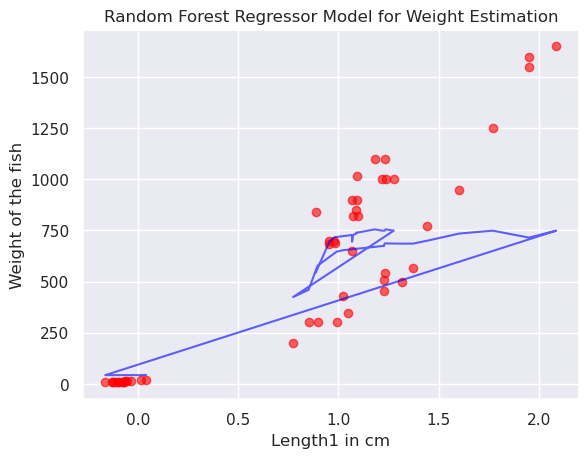

In [46]:
plt.scatter(x_test['Length1'], y_test, color='red', alpha=0.6)
plt.plot(x_test['Length1'], y_pred, color='blue',alpha=0.6)
plt.xlabel('Length1 in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Regressor Model for Weight Estimation');

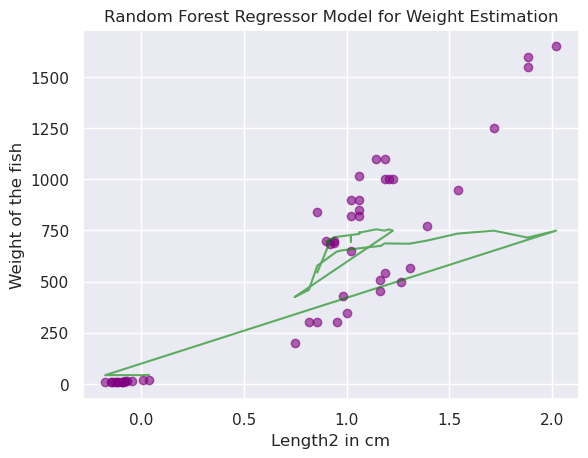

In [47]:
plt.scatter(x_test['Length2'], y_test, color='purple', alpha=0.6)
plt.plot(x_test['Length2'], y_pred, color='green',alpha=0.6)
plt.xlabel('Length2 in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Regressor Model for Weight Estimation');

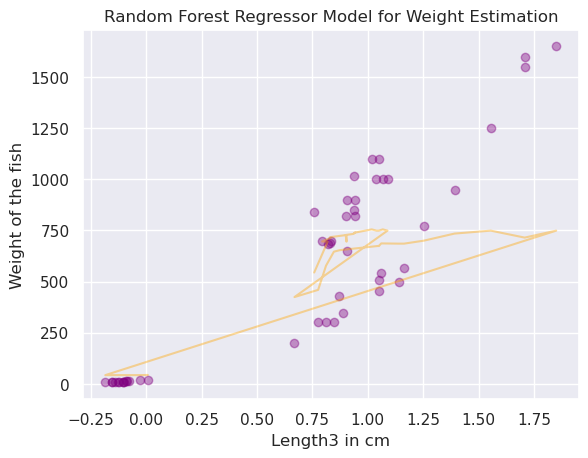

In [48]:
plt.scatter(x_test['Length3'], y_test, color='purple', alpha=0.4)
plt.plot(x_test['Length3'], y_pred, color='orange',alpha=0.4)
plt.xlabel('Length3 in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Regressor Model for Weight Estimation');

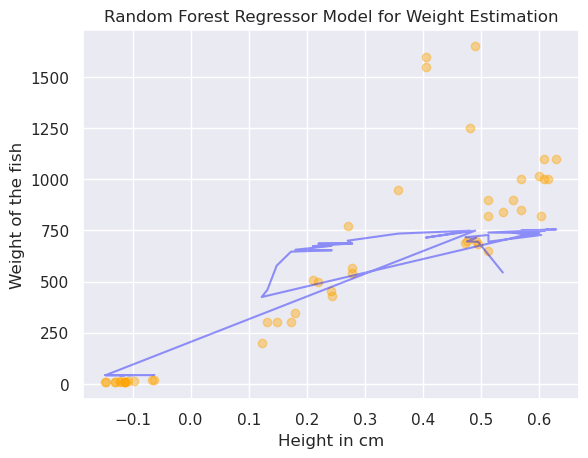

In [49]:
plt.scatter(x_test['Height'], y_test, color='orange', alpha=0.4)
plt.plot(x_test['Height'], y_pred, color='blue',alpha=0.4)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Regressor Model for Weight Estimation');

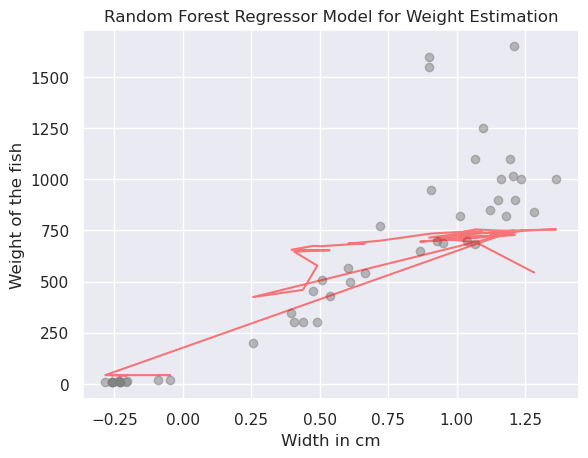

In [50]:
plt.scatter(x_test['Width'], y_test, color='gray', alpha=0.5)
plt.plot(x_test['Width'], y_pred, color='red',alpha=0.5)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Random Forest Regressor Model for Weight Estimation');